## Описание данных

Для анализа был взят датасет, содержащий информацию об оценках школьников за 3 экзамена - математика, чтение и письмо.
<br>Помимо результатов экзаменов, представлены следующие данные:
1. Пол
2. Этническая принадлежность
3. Уровень образования родителей
4. Питание (стандартное или уменьшенное)
5. Прохождение подготовительных курсов

Ссылка на датасет: https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams?resource=download

## Гипотезы
**Целью** данной работы является изучение взаимосвязей между переменными и оценка влияния каждого фактора на результаты сдачи экзаменов.
1. Гендерная принадлежность не влияет на результаты экзаменов
2. Этническая принадлежность не влияет на результаты экзаменов
3. Между уровнем образования родителей и результатами экзаменов существует прямая зависимость
4. Уменьшенный рацион питания негативно влияет на результаты экзаменов
5. Прохождение подготовительных курсов повышает вероятность успешной сдачи экзаменов
6. Существует корреляция между результатами экзаменов по разным предметам

## Анализ

Загрузим библиотеки, необходимые для работы с данными, и сам датасет.

In [205]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [265]:
url = 'https://raw.githubusercontent.com/polinaa99/Practical-Task-1.-Polina-Polyanskaya./main/exams.csv'
df = pd.read_csv(url)

Посмотрим на данные, выведем по пять первых, последних и случайных наблюдений.

In [266]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82
999,male,group A,some college,standard,completed,65,60,62


In [6]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
455,male,group B,some high school,standard,none,65,59,60
147,male,group E,some college,standard,none,60,55,46
193,female,group C,associate's degree,standard,completed,77,91,89
717,male,group D,high school,free/reduced,none,48,43,41
316,female,group C,high school,standard,completed,58,67,64


Датасет состоит из 8 переменных и 1000 наблюдений, пропущенные значения отсутствуют.
<br>Пять переменных являются категориальными, другие три - количественные.

In [7]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Распределение переменных

Взглянем подробнее на результаты экзаменов:
1. Самым сложным предметом оказалась математика, а самым простым - чтение. Об этом говорят среднее, медиана и минимальные значения.
2. Распределения близки к нормальным, медианы и средние практически равны.

In [5]:
df.describe().round(2)

,math score,reading score,writing score
count,1000.0,1000.00,1000.00
mean,66.4,69.00,67.74
std,15.4,14.74,15.60
min,13.0,27.00,23.00
25%,56.0,60.00,58.00
50%,66.5,70.00,68.00
75%,77.0,79.00,79.00
max,100.0,100.00,100.00


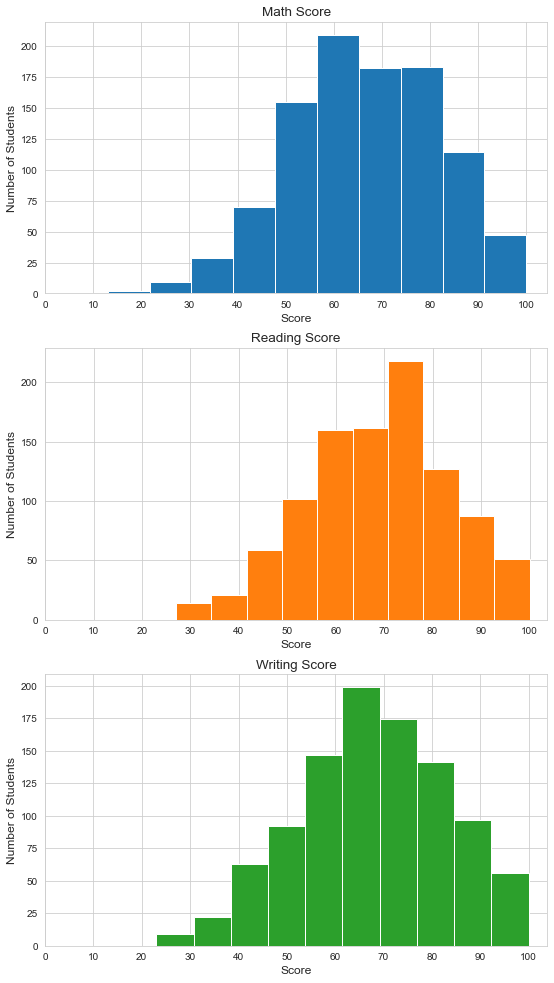

In [111]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 17))

def draw_hist(ax, var, x=range(0, 101, 10), color='tab:blue'):
    ax.hist(var, bins=10, color=color)
    ax.set_xticks(x)
    ax.set_title(var.name.title(), fontsize=13.5)
    ax.set_ylabel('Number of Students', fontsize=12)
    ax.set_xlabel('Score', fontsize=12)
    
draw_hist(ax1, df['math score'])
draw_hist(ax2, df['reading score'], color='tab:orange')
draw_hist(ax3, df['writing score'], color='tab:green')

Далее рассмотрим распределение категориальных переменных.
<br> Стоит отметить, что они распределены неравномерно, и это стоит учитывать при составлении выводов.

Половое распределение практически равное, мальчиков немного больше.

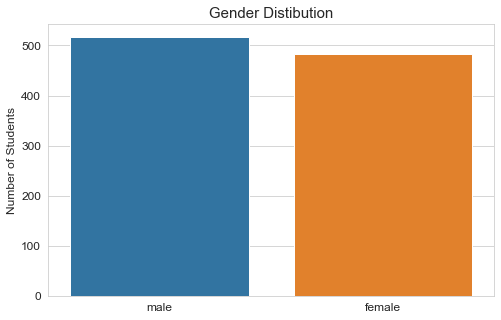

In [122]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender')
plt.title('Gender Distibution', fontsize=15)
plt.xlabel('')
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Распределение по этнической принадлежности неравномерное, к группе С принадлежат более трети наблюдений, к группе А - около 15%.

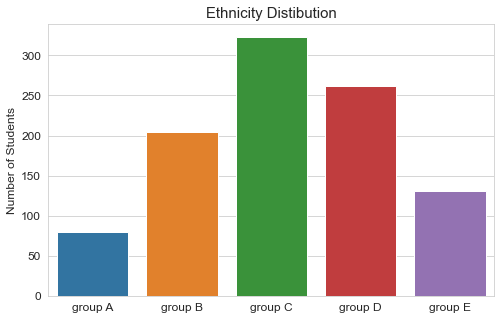

In [120]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='race/ethnicity', order=sorted(df['race/ethnicity'].unique()))
plt.title('Ethnicity Distibution', fontsize=15)
plt.xlabel('')
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Внутри этнических групп половое распределение также неравномерно.

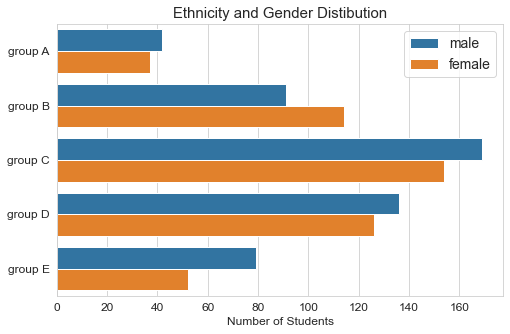

In [121]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='race/ethnicity', hue='gender', order=sorted(df['race/ethnicity'].unique()))
plt.title('Ethnicity and Gender Distibution', fontsize=15)
plt.ylabel('')
plt.xlabel('Number of Students', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.show()

Распределение по уровня образования родителей неравномерно.
<br> Степень магистра встречается в 7% наблюдений, колледж - примерно в 23%.

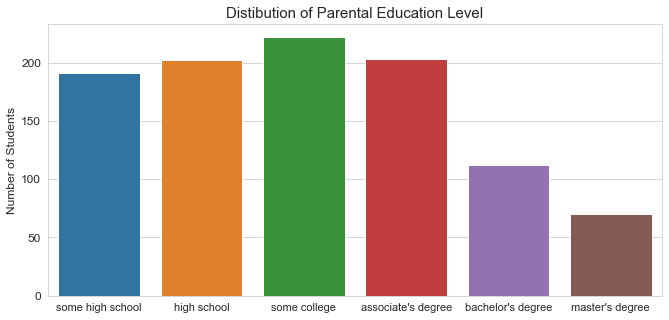

In [117]:
plt.figure(figsize=(11, 5))
order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
sns.countplot(data=df, x='parental level of education', order=order)
plt.title('Distibution of Parental Education Level', fontsize=15)
plt.xlabel('')
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
plt.show()

Подготовительные курсы прошла примерно треть учеников.

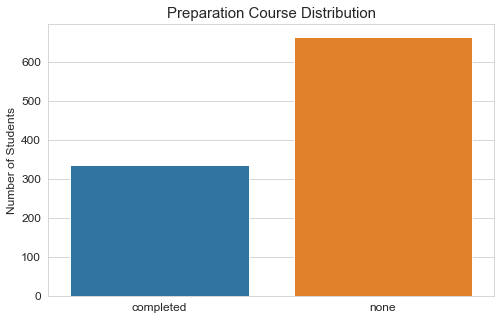

In [116]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='test preparation course')
plt.title('Preparation Course Distribution', fontsize=15)
plt.xlabel('')
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Связи между переменными

Мальчики лучше справились с экзаменом по математике, девочки - с чтением и письмом.

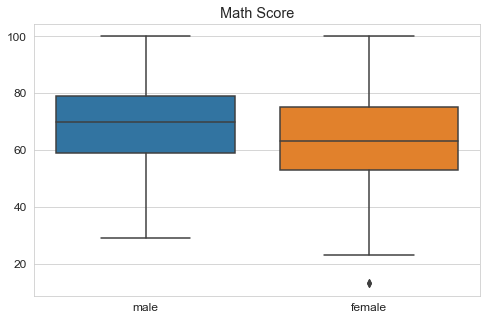

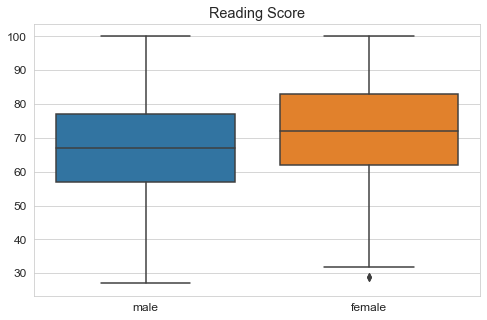

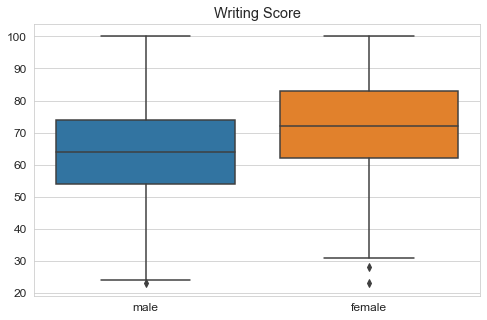

In [133]:
for subject in ['math score', 'reading score', 'writing score']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='gender', y=subject)
    plt.title(subject.title(), fontsize=14.5)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

Есть некоторые различия между результатами экзаменов в зависимости от этнической принадлежности:
1. Представители групп D и E в среднем справились лучше, чем представители других трех групп.
2. В группе C наблюдается самая высокая вариативность результатов.

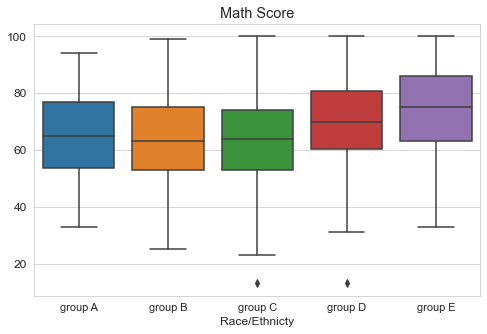

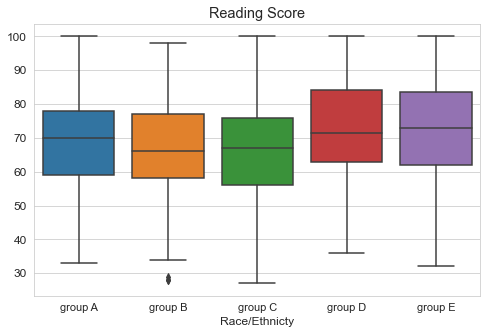

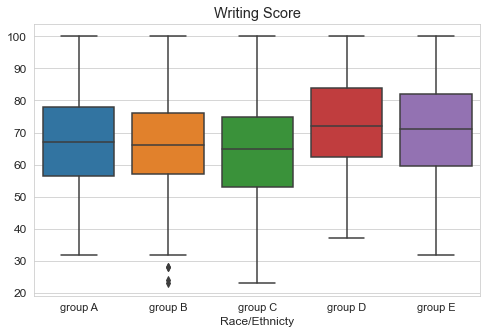

In [140]:
for subject in ['math score', 'reading score', 'writing score']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='race/ethnicity', y=subject, order=sorted(df['race/ethnicity'].unique()))
    plt.title(subject.title(), fontsize=14.5)
    plt.xlabel('Race/Ethnicty', fontsize=12)
    plt.ylabel('')
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=12)
    plt.show()

Уровень образования родителей можно условно отсортировать от меньшего к большему.
<br> При этом заметно, что результаты экзаменов увеличиваются с уровнем образования родителей.

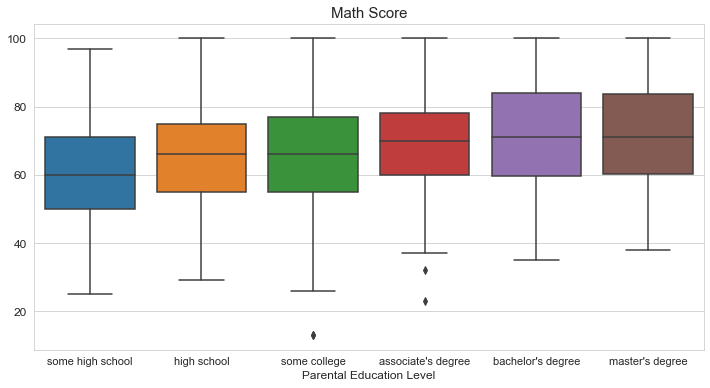

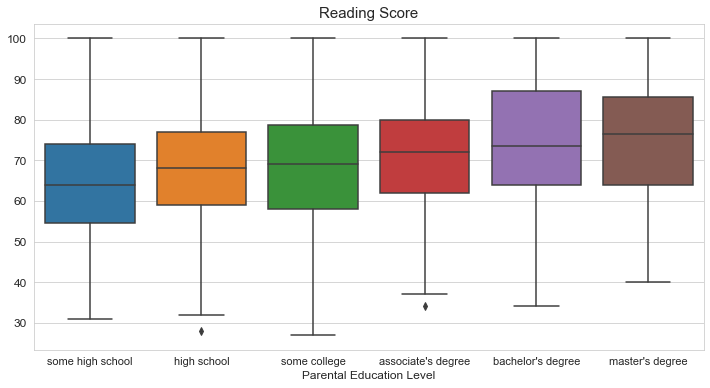

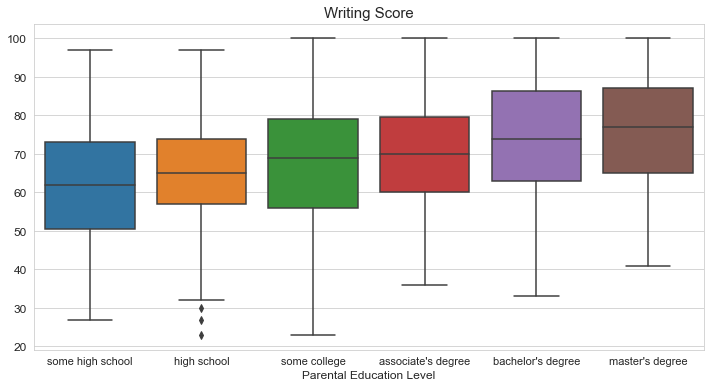

In [147]:
order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
for subject in ['math score', 'reading score', 'writing score']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='parental level of education', y=subject, order=order)
    plt.title(subject.title(), fontsize=15)
    plt.xlabel('Parental Education Level', fontsize=12)
    plt.ylabel('')
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=12)
    plt.show()

Школьники с уменьшенным рационом в среднем значительно хуже сдали все три экзамена.

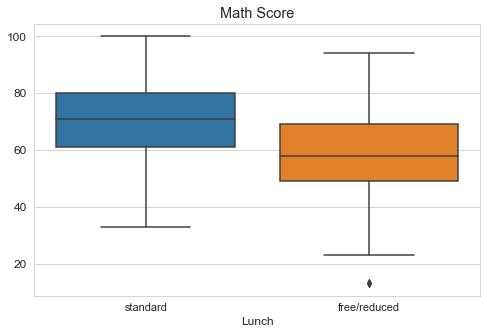

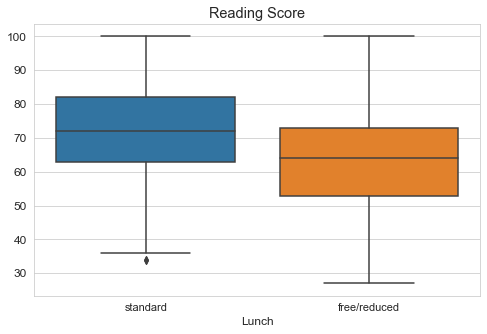

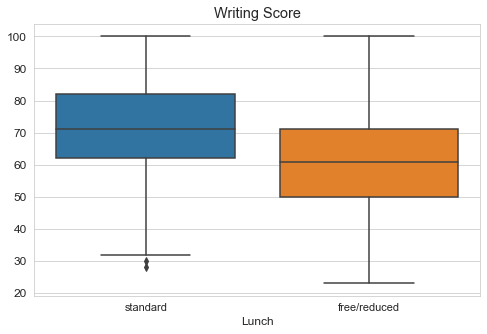

In [153]:
for subject in ['math score', 'reading score', 'writing score']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='lunch', y=subject)
    plt.title(subject.title(), fontsize=14.5)
    plt.xlabel('Lunch', fontsize=12)
    plt.ylabel('')
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=12)
    plt.show()

Школьники, прошедшие подготовительные курсы в среднем лучше сдали экзамены.

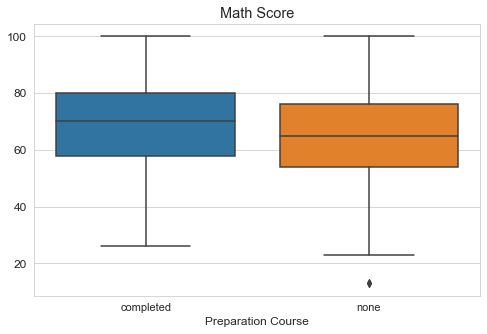

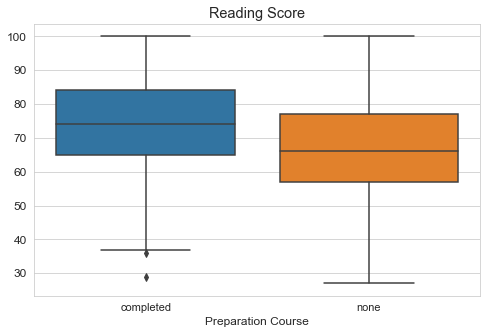

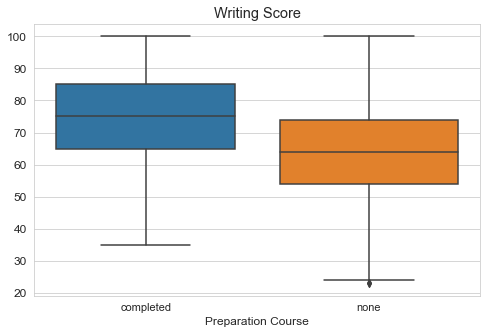

In [154]:
for subject in ['math score', 'reading score', 'writing score']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='test preparation course', y=subject)
    plt.title(subject.title(), fontsize=14.5)
    plt.xlabel('Preparation Course', fontsize=12)
    plt.ylabel('')
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=12)
    plt.show()

Между результатами разных экзаменов наблюдается сильная корреляция.
<br> Можно предположить, что внешние факторы примерно одинаково влияют на каждый из трех результатов.

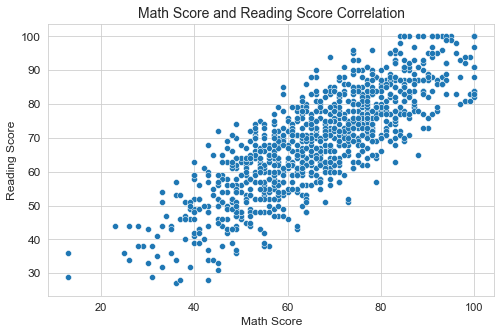

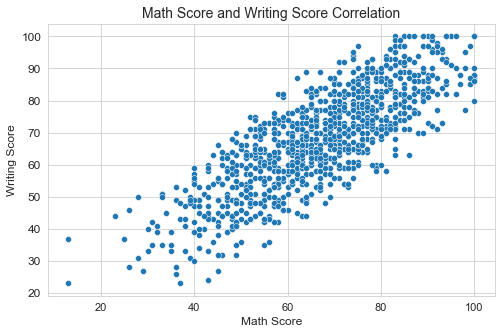

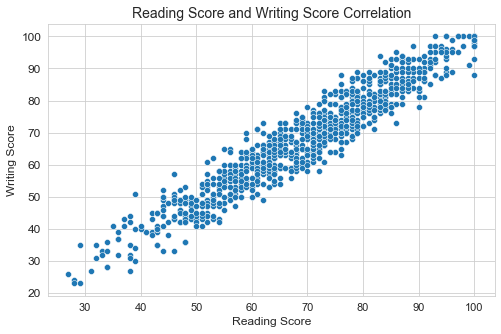

In [159]:
for first_subject in ['math score', 'reading score']:
    for second_subject in ['reading score', 'writing score']:
        if first_subject != second_subject:
            plt.figure(figsize=(8, 5))
            plt.title(first_subject.title() + ' and ' + second_subject.title() + ' Correlation', fontsize=14)
            plt.xlabel(first_subject.title(), fontsize=12)
            plt.ylabel(second_subject.title(), fontsize=12)
            plt.xticks(fontsize=11)
            plt.yticks(fontsize=12)
            sns.scatterplot(data=df, x=first_subject, y=second_subject)
            plt.show()

### Коэффициент корреляции

Некоторые независимые переменные могут коррелировать между собой.
<br>Например, уровень образования родителей и качество питания (образованные люди в среднем больше зарабатывают).
<br>Поэтому посчитаем коэффициент корреляции между переменными.
<br>Уровень образования родителей приведем к числовому формату, так как эта переменная является ранговой.

In [162]:
def edu_rank(x):
    edu_list = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
    return edu_list.index(x)

df['parental_edu_rank'] = df['parental level of education'].apply(edu_rank)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parental_edu_rank
0,male,group A,high school,standard,completed,67,67,63,1
1,female,group D,some high school,free/reduced,none,40,59,55,0
2,male,group E,some college,free/reduced,none,59,60,50,2
3,male,group B,high school,standard,none,77,78,68,1
4,male,group E,associate's degree,standard,completed,78,73,68,3


Представители этнических групп D и E в среднем более успешно справились с экзаменами, выделим их в отдельную группу.

In [194]:
def ethnicity(x):
    if x in {'group D', 'group E'}:
        return 1
    else:
        return 0

df['ethnicity_group'] = df['race/ethnicity'].apply(ethnicity)

Между независимыми переменными практически отсутствует корреляция, что подтверждает валидность приведенного выше анализа.

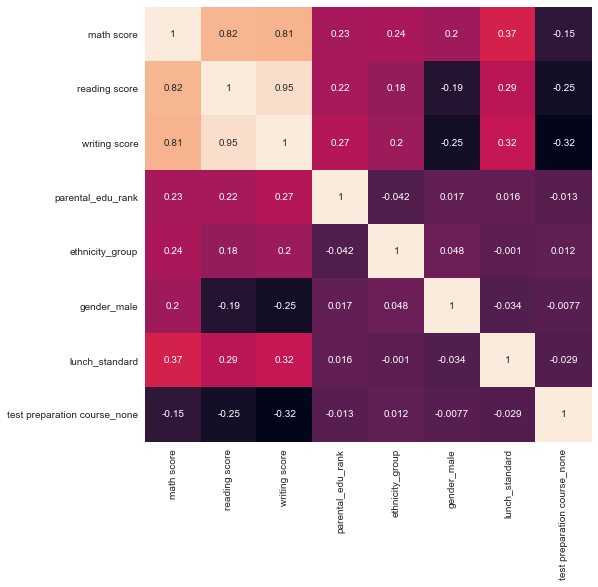

In [196]:
matrix = pd.get_dummies(df.drop(columns={'parental level of education', 'race/ethnicity'}), drop_first=True).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(matrix, cbar=False, annot=True)
plt.show()

### Линейная Регрессия

Чтобы точнее оценить влияние каждой переменной в совокупности, построим линейную регрессию.
<br>Выше мы убедились, что распределения целевых переменных близки к нормальному, а корреляция независимых переменных минимальна,
<br>поэтому данные не требуют предобработки.

In [215]:
X = pd.get_dummies(df.drop(columns={'parental level of education', 'race/ethnicity', 'math score', 'reading score', 'writing score'}), drop_first=True)
X.head()

,parental_edu_rank,ethnicity_group,gender_male,lunch_standard,test preparation course_none
0,1,0,1,1,0
1,0,1,0,0,1
2,2,1,1,0,1
3,1,0,1,1,1
4,3,1,1,1,0


Построим линейную регрессию для оценки по математике, разделив выборку на тест и контроль (20/80).
<br>Коэффициент детерминации модели составляет 0.31, а средняя абсолютная ошибка - 10.26 баллов.
<br>Это говорит о низком качестве модели, однако дальнейшая обработка данных может значительно улучшить её.

In [249]:
model = LinearRegression()
y = df['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R-squared:', round(model.score(X, y), 2))
print('MAE:', round(mae(y_test, y_pred), 2))

R-squared: 0.31
MAE: 10.26


Согласно построенной модели, наиболее сильный эффект на результаты экзамена по математике имеет питание.
<br>Энтическая принадлежность и пол также имеют большое влияние.

In [240]:
for i in range(len(X.columns)):
    print(X.columns[i], round(model.coef_[i], 2))

parental_edu_rank 2.5
ethnicity_group 8.18
gender_male 6.55
lunch_standard 12.71
test preparation course_none -4.38


Повторим те же действия для результатов экзамена по математике. Коэффициент детерминации составил 0.26,
<br>а средняя абсолютная ошибка 9.84 балла, однако это связано с меньшей вариативностью целевой переменной.

In [256]:
model = LinearRegression()

y = df['reading score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R-squared:', round(model.score(X, y), 2))
print('MAE:', round(mae(y_test, y_pred), 2))

R-squared: 0.26
MAE: 9.84


Прохождение подготовительных курсов имеет более высокий эффект, чем в предыдущей модели.

In [257]:
for i in range(len(X.columns)):
    print(X.columns[i], round(model.coef_[i], 2))

parental_edu_rank 2.39
ethnicity_group 6.18
gender_male -5.46
lunch_standard 8.85
test preparation course_none -7.38


Наконец, построим регрессию для результатов экзамена по письму. Коэффициент детерминации составил 0.37, MAE равняется 10.01.

In [258]:
model = LinearRegression()

y = df['writing score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R-squared:', round(model.score(X, y), 2))
print('MAE:', round(mae(y_test, y_pred), 2))

R-squared: 0.37
MAE: 10.01


Влияние переменных здесь схоже с предыдущей моделью - полноценное питание и подготовительные курсы дают наибольший эффект.

In [262]:
for i in range(len(X.columns)):
    print(X.columns[i], round(model.coef_[i], 2))

parental_edu_rank 3.02
ethnicity_group 7.72
gender_male -7.65
lunch_standard 10.16
test preparation course_none -9.99


## Выводы

1. Пол ученика имеет влияние на результаты экзамена - мальчики в среднем лучше справились с математикой, а девочки - с чтением и письмом.
2. Этническая принадлежность имеет влияние на результаты всех экзаменов - группы D и E в среднем справились лучше других. Скорее всего, это связано с социальным неравенством и разницей в доходах.
3. Между уровнем образования родителей и результатами экзаменов действительно существует прямая зависимость. Это также может быть вызвано разницей в доходах семей.
4. Дети, которые питались полноценно, в среднем лучше справились с экзаменами.
5. Прохождение подготовительных курсов действительно повышает вероятность успешной сдачи экзаменов, особенно сильное влияние наблюдается для экзаменов по чтению и письму.
6. Существует корреляция между результатами экзаменов по разным предметам, особенно сильная для чтения и письма. Можно предположить что результаты всех экзаменов определяются схожими факторами.
7. Качество построенных регрессионных моделей получилось недостаточным, что накладывает некоторые ограничения на полученные результаты. Тем не менее, дополнительная предобработка данных может это исправить.